In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data= pd.read_csv('aps_failure_training.csv')

In [5]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
data.describe()

,aa_000
count,5.910000e+03
mean,1.517600e+05
std,3.046716e+05
min,0.000000e+00
25%,1.533500e+03
50%,3.916500e+04
75%,9.605450e+04
max,2.746564e+06


In [8]:
data.shape

(5910, 171)

In [7]:
data.size

1010610

In [16]:
data.isna().sum()

class        0
aa_000       0
ab_000    4591
ac_000     711
ad_000    1801
          ... 
ee_007      69
ee_008      69
ee_009      69
ef_000     573
eg_000     573
Length: 171, dtype: int64

In [13]:
data.replace('na',np.NaN, inplace=True)

In [17]:
missing_values=data.isna().sum()


In [19]:
np.asarray(data.isna().sum())

array([   0,    0, 4591,  711, 1801,  518,  518,   68,   68,   68,   68,
         68,   68,   68,   68,   68,   68,   93,   85,   85,  864,   93,
         85,   93,   83,   93,   83,  573,   85,   85,   85,  518,  518,
         69,   69,   69,   69,   69,   69,   69,   69,   69,   69,   69,
         69,   69,   69,   69,   69,   69,   69,   69,   69,   70,   70,
         70,   70,   70,   70,   70,   70,   70,   70,   93,  573,  573,
        518,  518,   93,   93,   83,   83, 1921, 2277, 3319, 3717, 3934,
       4064, 4139, 4189,  104,   25,   99,   99,  307,   40,  573,  860,
        104,  306,   98,  518, 1801, 1801, 1801,   46,   46,   46,  986,
       1074,   70,   70,   70,   70,   70,   70,   70,   70,   70,   70,
       1801,  573,   99, 4591,   68,   68,   68,   68,   68,   68,   68,
         68,   68,   68, 1612, 1612, 1612, 1612, 1612, 1612, 1612, 1612,
       1612,  518,  573,  832,  832,  832,  832,  832,  832,  832,  832,
         99,  573,  573,  573,  573,  573,  573,  5

In [18]:
dataframe_with_null = pd.DataFrame()
dataframe_with_null['columns'] = data.columns
dataframe_with_null['missing values count'] = np.asarray(data.isna().sum()) 

In [22]:
dataframe_with_null

,columns,missing values count
0,class,0
1,aa_000,0
2,ab_000,4591
3,ac_000,711
4,ad_000,1801
...,...,...
166,ee_007,69
167,ee_008,69
168,ee_009,69
169,ef_000,573


In [23]:
data.isna().sum()

class        0
aa_000       0
ab_000    4591
ac_000     711
ad_000    1801
          ... 
ee_007      69
ee_008      69
ee_009      69
ef_000     573
eg_000     573
Length: 171, dtype: int64

In [27]:
(data.isnull().mean() < 0.6).index

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [28]:
data=data[data.columns[data.isnull().mean() < 0.6]] # drop if more than 60% of the values are missing for a column

In [29]:
data

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,pos,895178,NaN,NaN,NaN,NaN,0,0,0,0,...,9116224,4276644,8701496,8082264,5827284,2057354,1662302,10790,NaN,NaN
5906,pos,862134,NaN,NaN,NaN,NaN,0,38834,1227952,8877294,...,3456564,1793170,4159190,5847384,8364506,12875424,661442,2458,NaN,NaN
5907,pos,186856,NaN,NaN,0,0,0,0,4300,910488,...,2713108,800182,322322,71638,34662,7304,2538,0,0,0
5908,pos,605092,NaN,NaN,NaN,NaN,0,44320,1048970,7820828,...,3940400,1865730,3698692,3271958,9831898,3755392,65610,0,NaN,NaN


In [30]:
data['class'].unique()

array(['neg', 'pos'], dtype=object)

In [31]:
data['class'] = data['class'].map({'neg': 0, 'pos': 1})

In [32]:
# we need to convert all the data to numeric format
data=data.apply(pd.to_numeric)

In [33]:
data.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 164, dtype: object

In [34]:
for col in data.columns:
    data[col] = data[col].replace(np.NaN,data[col].mean())

In [35]:
data.isna().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64

In [37]:
data.describe()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5910.000000,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,...,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000
mean,0.169205,1.517600e+05,3.245861e+08,601.993186,9.624629,18.175816,1.065678e+03,8.915463e+03,7.092851e+04,4.780613e+05,...,1.064102e+06,4.903287e+05,1.026954e+06,1.043511e+06,8.555994e+05,6.446877e+05,2.648559e+05,1.478455e+04,0.146524,0.380364
std,0.374964,3.046716e+05,7.181922e+08,1965.748530,122.127228,255.392997,4.512880e+04,1.070108e+05,4.482834e+05,2.005305e+06,...,2.432343e+06,1.155651e+06,2.437269e+06,2.838865e+06,2.368243e+06,2.150717e+06,9.885467e+05,9.552245e+04,5.111739,9.124845
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.533500e+03,2.600000e+01,62.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.071000e+03,2.376500e+03,6.423000e+03,9.888500e+03,1.488000e+03,4.745000e+02,2.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.916500e+04,3.080000e+02,442.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.964260e+05,1.439760e+05,3.000670e+05,2.596230e+05,1.596130e+05,7.577400e+04,1.186800e+04,0.000000e+00,0.000000,0.000000
75%,0.000000,9.605450e+04,3.245861e+08,601.993186,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.169000e+03,...,7.186130e+05,3.368485e+05,7.244240e+05,6.064475e+05,4.425935e+05,2.604090e+05,1.679025e+05,2.548500e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,80024.000000,5386.000000,11284.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.700915e+07,5.743524e+07,3.160781e+07,3.413730e+07,1.926740e+07,3.810078e+06,362.000000,606.000000


In [36]:
columns=data.columns
data_n = data.describe()
col_to_drop=[]

In [39]:
for x in columns:
    if (data_n[x]['std'] == 0): # check if standard deviation is zero
        col_to_drop.append(x)

In [40]:
col_to_drop # the column with std deviation zero

['cd_000']

In [41]:
data.describe()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5910.000000,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,...,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000
mean,0.169205,1.517600e+05,3.245861e+08,601.993186,9.624629,18.175816,1.065678e+03,8.915463e+03,7.092851e+04,4.780613e+05,...,1.064102e+06,4.903287e+05,1.026954e+06,1.043511e+06,8.555994e+05,6.446877e+05,2.648559e+05,1.478455e+04,0.146524,0.380364
std,0.374964,3.046716e+05,7.181922e+08,1965.748530,122.127228,255.392997,4.512880e+04,1.070108e+05,4.482834e+05,2.005305e+06,...,2.432343e+06,1.155651e+06,2.437269e+06,2.838865e+06,2.368243e+06,2.150717e+06,9.885467e+05,9.552245e+04,5.111739,9.124845
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.533500e+03,2.600000e+01,62.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.071000e+03,2.376500e+03,6.423000e+03,9.888500e+03,1.488000e+03,4.745000e+02,2.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.916500e+04,3.080000e+02,442.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.964260e+05,1.439760e+05,3.000670e+05,2.596230e+05,1.596130e+05,7.577400e+04,1.186800e+04,0.000000e+00,0.000000,0.000000
75%,0.000000,9.605450e+04,3.245861e+08,601.993186,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.169000e+03,...,7.186130e+05,3.368485e+05,7.244240e+05,6.064475e+05,4.425935e+05,2.604090e+05,1.679025e+05,2.548500e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,80024.000000,5386.000000,11284.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.700915e+07,5.743524e+07,3.160781e+07,3.413730e+07,1.926740e+07,3.810078e+06,362.000000,606.000000


In [42]:
data['class']

0       0
1       0
2       0
3       0
4       0
       ..
5905    1
5906    1
5907    1
5908    1
5909    1
Name: class, Length: 5910, dtype: int64

In [43]:
X = data.drop(['class'],axis=1)

y = data['class']

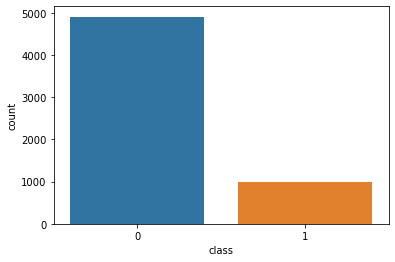

In [44]:
import seaborn as sns
sns.countplot(y)

In [45]:
from imblearn.over_sampling import SMOTE

In [48]:
sample = SMOTE()

In [49]:
X_bal,y_bal = sample.fit_resample(X,y)

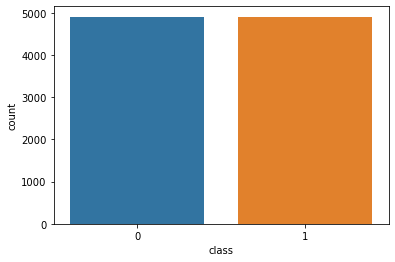

In [50]:
sns.countplot(y_bal)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns,index=X.index)

In [53]:
X_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.246391,2.515028,-0.163816,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.301835,...,0.072536,0.002644,-0.125524,-0.202112,-0.218089,-0.226331,-0.193869,-0.154789,-0.028667,-0.041688
1,-0.389639,-0.451987,0.000000,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.305850,...,-0.264254,-0.270230,-0.301038,-0.281155,-0.304870,-0.262050,-0.169232,-0.139084,-0.028667,-0.041688
2,-0.363438,-0.451987,-0.255392,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.309359,...,-0.323470,-0.286025,-0.247413,-0.223329,-0.225863,-0.226300,-0.171709,-0.149407,-0.028667,-0.041688
3,-0.498113,-0.451987,-0.272689,-0.078815,-0.032015,-0.023616,-0.083321,-0.158236,-0.238260,-0.309240,...,-0.437419,-0.424284,-0.421366,-0.367596,-0.361307,-0.299780,-0.267947,-0.154789,0.753912,3.465518
4,-0.298333,-0.451985,-0.073257,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.300461,...,-0.181770,-0.225467,-0.255084,-0.245303,-0.240133,-0.154905,0.171072,-0.142037,-0.028667,-0.041688


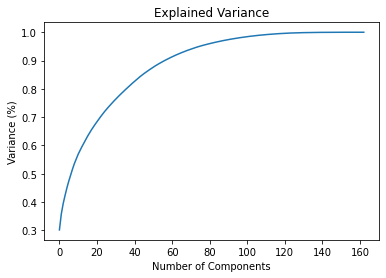

In [64]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plot
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')
plot.show()

In [58]:
pca = PCA(n_components=100) # deciding n=100 from above figure
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,index=X_scaled.index)
principal_x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.010182,-0.730615,-0.749644,0.613667,-0.511020,-0.381277,0.172156,-0.526035,-0.315168,0.401244,...,0.590303,0.271509,-0.203839,0.312091,0.260283,0.343440,0.129785,0.287705,-0.331307,0.349932
1,-2.471281,-0.226756,0.071010,0.106098,-0.205778,-0.109652,0.081457,-0.175051,-0.076733,-0.195236,...,-0.118173,-0.122889,-0.033434,0.009051,-0.097642,-0.089245,-0.086536,-0.185065,0.135441,0.215907
2,-2.910558,-0.236646,0.323054,-0.271688,-0.319691,0.167476,-0.187882,-0.055073,-0.186750,0.431161,...,0.027444,0.041732,-0.042739,0.045555,0.022806,-0.013461,-0.073078,0.015230,0.023763,0.033472
3,-3.893221,-0.032993,0.669323,-0.334443,0.115691,0.312502,-0.132716,0.300123,0.810643,-0.298217,...,0.091344,0.048252,-0.068152,-0.037403,0.005317,0.070641,0.004304,-0.141486,0.083279,0.087396
4,-2.016483,-0.153569,-0.409120,-0.027122,-0.146041,-0.016216,-0.008420,-0.356141,-0.303330,0.463903,...,0.050329,0.028169,-0.032157,0.091465,0.093816,0.052336,-0.048353,0.006154,0.134449,-0.023286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,18.291188,-9.106345,2.935254,2.334066,-0.308760,-3.875992,-1.598874,-0.711171,1.343502,1.754941,...,0.098724,-1.230614,0.300151,0.568102,1.510008,0.424435,1.731474,0.688792,-0.628154,0.017444
5906,15.558847,5.181405,6.672165,-2.998986,-1.157562,-1.147307,0.217566,0.670711,-0.000892,0.172703,...,-0.119868,-0.858609,-2.070370,-0.222400,-0.319467,-0.639780,0.754687,1.888750,-0.341755,-0.063559
5907,16.275666,-2.407067,-6.644978,2.767912,8.903914,5.697961,7.233277,6.249944,4.173732,-3.906881,...,-0.941798,-0.912313,-1.918659,-0.748902,-1.222730,-1.463671,-0.903295,0.948674,1.741275,0.986976
5908,13.205136,3.747691,5.639322,-2.251092,1.749655,0.189440,0.618049,0.387330,-0.015881,2.900454,...,-0.073338,1.755496,-0.663441,2.258607,-1.437891,-0.925033,0.736312,2.170039,2.926978,-0.889488


In [59]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 1/3)

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
from sklearn.metrics  import roc_auc_score,accuracy_score
accuracy_score(y_test, knn.predict(x_test))

0.9543147208121827

In [69]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [70]:
svc.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [71]:
accuracy_score(y_test, svc.predict(x_test))

0.9588832487309644

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svc.predict(x_test))

array([[1581,   42],
       [  39,  308]], dtype=int64)

In [78]:
cm = confusion_matrix(y_test, knn.predict(x_test))   #TN, FP , FN, TP

In [79]:
cm[0][0]

1593